In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import argparse
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

!gdown 16rEm1ZvxTGv_2SxM6SEep3QbIelqYzmP
!gdown 1Xyxt1Z4rsswxh3iRPGQcYZDDnDOrHQKR

Downloading...
From: https://drive.google.com/uc?id=16rEm1ZvxTGv_2SxM6SEep3QbIelqYzmP
To: /content/Customer_test.csv
100% 37.9k/37.9k [00:00<00:00, 43.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Xyxt1Z4rsswxh3iRPGQcYZDDnDOrHQKR
To: /content/Customer_train.csv
100% 96.8k/96.8k [00:00<00:00, 77.8MB/s]


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

train_df = pd.read_csv('Customer_train.csv')
test_df = pd.read_csv('Customer_test.csv')

# Fill missing values in training data
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

cat_cols = train_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Separate features and target from training data
X_train = train_df.drop(['ID', 'Segmentation'], axis=1)
y_train = train_df['Segmentation']

# Normalize numerical features in training data
normalizer = Normalizer()
numerical_features = X_train.select_dtypes(include=[np.number]).columns
X_train[numerical_features] = normalizer.fit_transform(X_train[numerical_features])

# Convert categorical variables in training data using LabelEncoder
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

# Fill missing values in test data
num_cols_test = test_df.select_dtypes(include=['float64', 'int64']).columns
test_df[num_cols_test] = test_df[num_cols_test].fillna(test_df[num_cols_test].median())

cat_cols_test = test_df.select_dtypes(include=['object']).columns
for col in cat_cols_test:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Separate features from test data
X_test = test_df.drop(['ID'], axis=1)

# Normalize numerical features in test data
X_test[numerical_features] = normalizer.transform(X_test[numerical_features])

# Convert categorical variables in test data using the saved LabelEncoders
for column in X_test.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        X_test[column] = label_encoders[column].transform(X_test[column])


# Train One-vs-All Classifier
ova_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
ova_classifier.fit(X_train, y_train)

# Train One-vs-One Classifier
# ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', probability=True))
# ovo_classifier.fit(X_train, y_train)

# Predict labels on the test data using OvA
y_pred_ova = ova_classifier.predict(X_test)

# Predict labels on the test data using OvO
# y_pred_ovo = ovo_classifier.predict(X_test)

# Add predictions to the test DataFrame
test_df['Predicted_Segmentation_OvA'] = y_pred_ova
# test_df['Predicted_Segmentation_OvO'] = y_pred_ovo


In [54]:
# # parser = argparse.ArgumentParser(description="One-vs-All (OvA) Classifier for Multi-Class Classification with Support Vector Machines (SVM)")
# # parser.add_argument("test_file", help="Path to the test file in the same format as the training data")
# # args = parser.parse_args()
# # Customer_test = pd.read_csv(args.test_file)
# # Customer = pd.read_csv('Customer_train.csv')
# # Customer_test = pd.read_csv('Customer_test.csv')

# # X = Customer.drop('Segmentation', axis=1)
# # y = Customer['Segmentation']
# # numeric_column_means = X.select_dtypes(include=['int', 'float']).mean()
# # X.fillna(numeric_column_means, inplace=True)
# # cat_columns = X.select_dtypes(include=['object'])
# # X_encoded = pd.get_dummies(X, columns=cat_columns.columns)

# # X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# unique_classes = y_train.unique()

# ova_classifiers = {}

# for target_class in unique_classes:
#     binary_y_train = (y_train == target_class).astype(int)

#     svc = SVC(kernel='linear', probability=True)
#     svc.fit(X_train, binary_y_train)

#     ova_classifiers[target_class] = svc

# yhat_test = []

# # print(ova_classifiers)

# for i in range(len(X_test)):
#     class_scores = {cls: binary_svc.predict_proba(X_test.iloc[i:i+1])[0][1] for cls, binary_svc in ova_classifiers.items()}

#     predicted_class = max(class_scores, key=class_scores.get)
#     yhat_test.append(predicted_class)

# accuracy = accuracy_score(y_pred_ova, yhat_test)
# predictions_df = pd.DataFrame(data={'predicted': yhat_test})
# predictions_df.to_csv('ova.csv', index=False)
# print(f"Predictions saved to 'ova.csv'.")
# print(f"Accuracy: {accuracy * 100:.2f}%")

# # Calculate and display the confusion matrix
# conf_matrix = confusion_matrix(y_pred_ova, yhat_test)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Calculate and display the classification report (precision, recall, F1-score)
# report = classification_report(y_pred_ova, yhat_test) #, target_names=unique_classes)
# print("Classification Report:")
# print(report)

Predictions saved to 'ova.csv'.
Accuracy: 100.00%
Confusion Matrix:
[[324   0   0   0]
 [  0 120   0   0]
 [  0   0 108   0]
 [  0   0   0 237]]


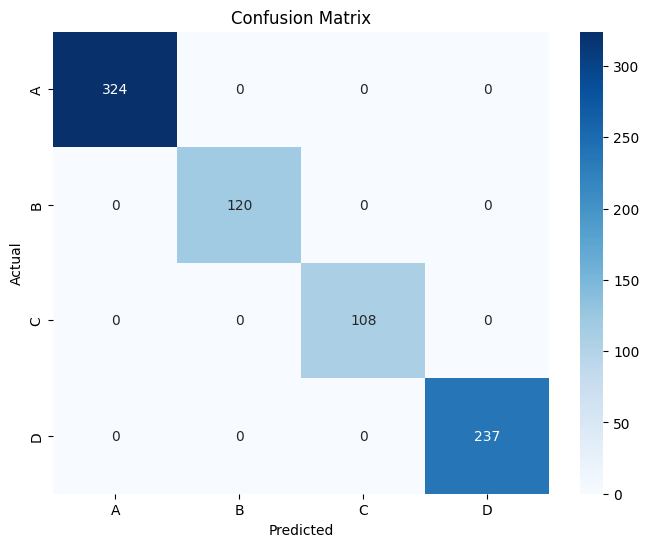

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       324
           B       1.00      1.00      1.00       120
           C       1.00      1.00      1.00       108
           D       1.00      1.00      1.00       237

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



In [62]:
# # Implementing One-vs-All Classifier
# class OneVsAll:
#     def __init__(self):
#         self.models = {}
#         self.classes = None

#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         for c in self.classes:
#             # Create binary labels for the current class
#             y_binary = (y == c).astype(int)
#             # Train SVC model for the current class
#             svc = SVC(kernel='linear', probability=True)
#             svc.fit(X, y_binary)
#             self.models[c] = svc

#     def predict(self, X):
#         # # Get probabilities from all models
#         # probabilities = np.array([self.models[c].predict_proba(X)[:, 1] for c in self.classes]).T
#         # # print(probabilities)
#         # # Return the class with the highest probability
#         # return self.classes[np.argmax(probabilities, axis=1)]

#         yhat_test = []
#         for i in range(len(X)):
#             class_scores = {cls: binary_svc.predict_proba(X.iloc[i:i+1])[0][1] for cls, binary_svc in self.models.items()}
#             predicted_class = max(class_scores, key=class_scores.get)
#             yhat_test.append(predicted_class)
#         return np.array(yhat_test)


# # Train OvA Classifier
# ova_classifier = OneVsAll()
# ova_classifier.fit(X_train, y_train)

# # Predict on Test Data
# yhat_test = ova_classifier.predict(X_test)

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin, clone
import numpy as np

class CustomOneVsRestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator):
        """
        Initializes the CustomOneVsRestClassifier.

        Parameters:
        -----------
        estimator : object
            A binary classifier instance (like LogisticRegression) that will be used for each "one vs rest" task.
        """
        self.estimator = estimator
        self.estimators_ = []

    def fit(self, X, y):
        """
        Fits the OvR classifier for each class.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        y : array-like, shape (n_samples,)
            Target values, where each value is the class label for that sample.

        Returns:
        --------
        self : object
            Returns an instance of the classifier.
        """
        self.classes_ = np.unique(y)
        self.estimators_ = []

        # Train one classifier for each class
        for class_ in self.classes_:
            y_binary = np.where(y == class_, 1, 0)  # Convert the problem into a binary classification (one vs rest)
            estimator = clone(self.estimator)  # Clone the estimator for each class
            estimator.fit(X, y_binary)  # Fit the binary classifier
            self.estimators_.append(estimator)  # Save the fitted classifier

        return self

    def predict(self, X):
        """
        Predicts the class labels for the input samples X.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data to predict on.

        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Predicted class labels.
        """
        # Get decision function or probability for each class
        predictions = np.zeros((X.shape[0], len(self.classes_)))

        for i, estimator in enumerate(self.estimators_):
            # Get the confidence score (decision function or probability)
            if hasattr(estimator, "decision_function"):
                predictions[:, i] = estimator.decision_function(X)
            else:
                predictions[:, i] = estimator.predict_proba(X)[:, 1]

        # Select the class with the highest score
        return self.classes_[np.argmax(predictions, axis=1)]

    def predict_proba(self, X):
        """
        Predicts the probability estimates for each class.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data.

        Returns:
        --------
        proba : array, shape (n_samples, n_classes)
            Predicted probability estimates for each class.
        """
        # Store the probabilities for each class
        probas = np.zeros((X.shape[0], len(self.classes_)))

        for i, estimator in enumerate(self.estimators_):
            probas[:, i] = estimator.predict_proba(X)[:, 1]  # Get the probability of class 1

        return probas



# Train the custom OneVsRestClassifier
ova_classifier_custom = CustomOneVsRestClassifier(SVC(kernel='linear', probability=True))
ova_classifier_custom.fit(X_train, y_train)

# Predict labels on the test data using the custom OvA
yhat_test = ova_classifier_custom.predict(X_test)

accuracy = accuracy_score(y_pred_ova, yhat_test)
predictions_df = pd.DataFrame(data={'predicted': yhat_test})
predictions_df.to_csv('ova.csv', index=False)
print(f"Predictions saved to 'ova.csv'.")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_pred_ova, yhat_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
labels = np.unique(yhat_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display the classification report (precision, recall, F1-score)
report = classification_report(y_pred_ova, yhat_test) #, target_names=unique_classes)
print("Classification Report:")
print(report)